## Creating the Frailty Index
#### By Gavin Qu, July 10th 2024

### Data Extraction
- Reads each wave's data from its respective file
- Extracts only the specified variables for each wave
- Adds a 'wave' column to identify the source wave for each row
- Combines all waves' data into a single DataFrame

In [1]:
import os
import pandas as pd

# Set directory
data_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Base list of relevant variables (without wave prefix)
base_variables = [
    'pidp',
    'age_dv',
    'disdif1', 'disdif2', 'disdif3', 'disdif4', 'disdif5', 'disdif6', 'disdif7', 'disdif8',
    'disdif9', 'disdif10', 'disdif11',
    'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 
    'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 
    'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 
    'hcondever1', 'hcondever2', 'hcondever3', 'hcondever4', 'hcondever5', 'hcondever6', 'hcondever7', 'hcondever8', 
    'hcondever9', 'hcondever10', 'hcondever11', 'hcondever12', 'hcondever13', 'hcondever14', 'hcondever15', 'hcondever16', 
    'hcondnew1', 'hcondnew2', 'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8', 
    'hcondnew9', 'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15', 'hcondnew16', 
]

# Initialize an empty list to store DataFrames
df_list = []

# Process each wave
for wave in 'abcdefghijklm':
    file_path = os.path.join(data_dir, f'{wave}_indresp.dta')
    
    # Read the .dta file to get available columns
    with pd.read_stata(file_path, iterator=True) as stata_file:
        available_columns = stata_file.variable_labels().keys()
    
    # Create a list of variables that exist in this wave's data
    wave_vars = ['pidp'] + [f'{wave}_{var}' for var in base_variables[1:] if f'{wave}_{var}' in available_columns]
    
    # Read only the available columns
    df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)
    df_wave['wave'] = wave
    
    # Remove wave prefix from column names
    df_wave.columns = ['pidp' if col == 'pidp' else col[2:] if col.startswith(f'{wave}_') else col for col in df_wave.columns]
    
    df_list.append(df_wave)
    print(f"Processed wave {wave}, extracted {len(wave_vars)} variables")

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to CSV
output_path = os.path.join(output_dir, 'ukhls_extracted.csv')
df_combined.to_csv(output_path, index=False)

print(f"Extracted data saved to {output_path}")
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")

Processed wave a, extracted 29 variables
Processed wave b, extracted 29 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave c, extracted 45 variables
Processed wave d, extracted 45 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/1236701905.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave e, extracted 45 variables
Processed wave f, extracted 45 variables
Processed wave g, extracted 45 variables
Processed wave h, extracted 45 variables
Processed wave i, extracted 45 variables
Processed wave j, extracted 43 variables
Processed wave k, extracted 43 variables
Processed wave l, extracted 43 variables
Processed wave m, extracted 43 variables
Extracted data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv
Total rows: 533476
Total columns: 76


**The resulting csv file from the previous step does not organize the 'pidp' correctly and next to each other, so the following script with reorganize it into a easier to work with long panel with the same 'pidp' all below each other.**

In [2]:
import pandas as pd
import os

# Set input and output directories
input_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Read the input CSV file
input_file = os.path.join(input_dir, 'ukhls_extracted.csv')
df = pd.read_csv(input_file)

# Sort the dataframe by 'pidp' and 'wave'
df_sorted = df.sort_values(['pidp', 'wave'])

# Reset the index
df_sorted = df_sorted.reset_index(drop=True)

# Save the sorted dataframe to a new CSV file
output_file = os.path.join(output_dir, 'ukhls_long_panel_format.csv')
df_sorted.to_csv(output_file, index=False)

print(f"Long panel format data saved to {output_file}")
print(f"Total rows: {len(df_sorted)}")
print(f"Total columns: {len(df_sorted.columns)}")

Long panel format data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv
Total rows: 533476
Total columns: 76


### Data Wrangling and New Variable Construction
#### Creating the 'healthcond' variable

1. For wave 'a', it only considers hcond.
2. It skips wave 'b' for hcond.
3. For waves 'c' through 'i' (waves 2-9), it considers both hcond (for new participants) and hcondn (for existing participants).
4. For wave 'j' (wave 10), it uses hcond and hcondever.
5. For waves 'k', 'l', and 'm' (waves 11-13), it uses hcond and hcondnew.
6. It converts all negative values to NaN.
7. After processing each wave, it forward-fills the health condition status for each individual.

In [4]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_long_panel_format.csv')

# Define waves
waves = 'abcdefghijklm'

def create_health_condition_columns(df):
    for i in range(1, 17):
        condition_col = f'healthcond{i}'
        df[condition_col] = np.nan
        
        for wave in waves:
            wave_mask = df['wave'] == wave
            hcond_col = f'hcond{i}'
            
            if wave == 'a':
                if hcond_col in df.columns:
                    df.loc[wave_mask, condition_col] = df.loc[wave_mask, hcond_col].map({1: 1, 0: 0})
            elif wave == 'b':
                # Skip wave b for hcond
                continue
            elif wave in 'cdefghij':  # Waves 2-9
                hcondn_col = f'hcondn{i}'
                if hcond_col in df.columns and hcondn_col in df.columns:
                    df.loc[wave_mask, condition_col] = np.where(
                        (df.loc[wave_mask, hcond_col] == 1) | (df.loc[wave_mask, hcondn_col] == 1), 1,
                        np.where((df.loc[wave_mask, hcond_col] == 0) & (df.loc[wave_mask, hcondn_col] == 0), 0, np.nan)
                    )
            elif wave == 'j':  # Wave 10
                hcondever_col = f'hcondever{i}'
                if hcond_col in df.columns and hcondever_col in df.columns:
                    df.loc[wave_mask, condition_col] = np.where(
                        (df.loc[wave_mask, hcond_col] == 1) | (df.loc[wave_mask, hcondever_col] == 1), 1,
                        np.where((df.loc[wave_mask, hcond_col] == 0) & (df.loc[wave_mask, hcondever_col] == 0), 0, np.nan)
                    )
            elif wave in 'klm':  # Waves 11-13
                hcondnew_col = f'hcondnew{i}'
                if hcond_col in df.columns and hcondnew_col in df.columns:
                    df.loc[wave_mask, condition_col] = np.where(
                        (df.loc[wave_mask, hcond_col] == 1) | (df.loc[wave_mask, hcondnew_col] == 1), 1,
                        np.where((df.loc[wave_mask, hcond_col] == 0) & (df.loc[wave_mask, hcondnew_col] == 0), 0, np.nan)
                    )
        
        # Convert negative values to NaN
        for col in [col for col in df.columns if col.endswith(str(i))]:
            df[col] = df[col].where(df[col] >= 0, np.nan)
    
    return df

# Apply the function to create health condition columns
df = create_health_condition_columns(df)

# Sort the dataframe by pidp and wave
df = df.sort_values(['pidp', 'wave'])

# Forward fill the health conditions for each pidp
for i in range(1, 17):
    col = f'healthcond{i}'
    df[col] = df.groupby('pidp')[col].transform(lambda x: x.ffill())

# Save the updated dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Updated dataset saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv
Total rows: 533476
Total columns: 92


#### The following code reorganizes the death dataset into a long panel format

In [19]:
import pandas as pd
import numpy as np

# Load the death dataset from .dta file
death_df = pd.read_stata('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/xwavedat.dta')

# Define waves
waves = 'abcdefghijklm'

# Function to extract wave number from dcsedw_dv
def extract_wave(value):
    if isinstance(value, str) and value.startswith("UKHLS Wave"):
        wave_num = int(value.split()[-1]) - 18  # Subtract 18 to get UKHLS wave number
        if 2 <= wave_num <= 13:
            return waves[wave_num - 1]  # Convert to corresponding letter
    return None

# Process death information
death_df['wave'] = death_df['dcsedw_dv'].apply(extract_wave)
death_df['death'] = 1

# Remove rows where wave is None (no death recorded in UKHLS waves 2-13)
death_df = death_df.dropna(subset=['wave'])

# Select only necessary columns
death_df_long = death_df[['pidp', 'wave', 'death']]

# Sort by pidp and wave
death_df_long = death_df_long.sort_values(['pidp', 'wave'])

# Reset index
death_df_long = death_df_long.reset_index(drop=True)

# Save the long format death dataset
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv'
death_df_long.to_csv(output_path, index=False)

print(f"Long panel death data saved to {output_path}")
print(f"Total rows: {len(death_df_long)}")
print(f"Unique pidps: {death_df_long['pidp'].nunique()}")
print("\nSample of the data:")
print(death_df_long.head(10))

# Additional check for multiple death records
multiple_deaths = death_df_long.groupby('pidp').size().sort_values(ascending=False)
if (multiple_deaths > 1).any():
    print("\nWarning: Some pidps have multiple death records:")
    print(multiple_deaths[multiple_deaths > 1].head())
else:
    print("\nNo pidps with multiple death records found.")

# Distribution of deaths by wave
print("\nDistribution of deaths by wave:")
print(death_df_long['wave'].value_counts().sort_index())

Long panel death data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv
Total rows: 4444
Unique pidps: 4444

Sample of the data:
       pidp wave  death
0   3490445    l      1
1  68006807    j      1
2  68014287    l      1
3  68020407    l      1
4  68025847    j      1
5  68034007    c      1
6  68044891    e      1
7  68048287    j      1
8  68048291    c      1
9  68060525    m      1

No pidps with multiple death records found.

Distribution of deaths by wave:
wave
b    276
c    381
d    457
e    347
f    351
g    433
h    432
i    378
j    366
k    346
l    337
m    340
Name: count, dtype: int64


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_33083/2893861321.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multiple_deaths = death_df_long.groupby('pidp').size().sort_values(ascending=False)


### Construction of the Frailty Index

We also assigned a frailty of 1 if that person has died, using a previously extracted dataframe with death and wave data. 

In [25]:
import pandas as pd
import numpy as np

# Load the main dataset (long format)
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv')

# Load the death dataset (now in long format)
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/death_data_long_panel.csv')

# Define waves
waves = 'abcdefghijklm'
wave_order = {wave: i for i, wave in enumerate(waves)}

# Function to calculate frailty
def calculate_frailty(row):
    healthcond_cols = [f'healthcond{i}' for i in range(1, 17)]
    disdif_cols = [f'disdif{i}' for i in range(1, 12)]
    
    relevant_cols = healthcond_cols + disdif_cols
    values = row[relevant_cols]
    
    if values.isna().all():
        return np.nan
    
    count_ones = (values == 1).sum()
    return count_ones / 27

# Calculate frailty for all individuals
df['frailty'] = df.apply(calculate_frailty, axis=1)

print("After initial frailty calculation:")
print("Number of rows with frailty calculated:", df['frailty'].notna().sum())
print("Maximum frailty value:", df['frailty'].max())

# Sort the dataframe
df['wave_order'] = df['wave'].map(wave_order)
df = df.sort_values(['pidp', 'wave_order'])

# Process death information
for _, death_row in death_df.iterrows():
    pidp = death_row['pidp']
    death_wave = death_row['wave']
    death_wave_order = wave_order[death_wave]
    
    # Set frailty to 1 for this pidp from death wave onwards
    mask = (df['pidp'] == pidp) & (df['wave_order'] >= death_wave_order)
    df.loc[mask, 'frailty'] = 1.0

print("\nAfter applying death information:")
print("Number of rows with frailty = 1:", (df['frailty'] == 1).sum())
print("Maximum frailty value:", df['frailty'].max())

# Sample of death cases
print("\nSample of 5 death cases:")
sample_deaths = death_df.head()
for _, death_row in sample_deaths.iterrows():
    pidp = death_row['pidp']
    death_wave = death_row['wave']
    sample = df[(df['pidp'] == pidp) & (df['wave_order'] >= wave_order[death_wave])].head(3)
    print(f"\nPIDP: {pidp}, Death Wave: {death_wave}")
    print(sample[['wave', 'frailty']])

# Save the result
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv'
df.to_csv(output_path, index=False)

print(f"\nData with frailty measures saved to {output_path}")

# Frailty summary
print("\nFrailty Summary:")
print(df['frailty'].describe())

# Additional checks
print("\nFrailty distribution:")
print(df['frailty'].value_counts(normalize=True).sort_index())

# Check for any pidps in death_df not in main df
death_pidps = set(death_df['pidp'])
main_pidps = set(df['pidp'])
missing_pidps = death_pidps - main_pidps
if missing_pidps:
    print(f"\nNumber of pidps in death dataset not found in main dataset: {len(missing_pidps)}")
    print("Sample of missing pidps:", list(missing_pidps)[:5])
else:
    print("\nAll pidps from death dataset are present in main dataset.")

After initial frailty calculation:
Number of rows with frailty calculated: 454074
Maximum frailty value: 0.7037037037037037

After applying death information:
Number of rows with frailty = 1: 0
Maximum frailty value: 0.7037037037037037

Sample of 5 death cases:

PIDP: 3490445, Death Wave: l
Empty DataFrame
Columns: [wave, frailty]
Index: []

PIDP: 68006807, Death Wave: j
Empty DataFrame
Columns: [wave, frailty]
Index: []

PIDP: 68014287, Death Wave: l
Empty DataFrame
Columns: [wave, frailty]
Index: []

PIDP: 68020407, Death Wave: l
Empty DataFrame
Columns: [wave, frailty]
Index: []

PIDP: 68025847, Death Wave: j
Empty DataFrame
Columns: [wave, frailty]
Index: []

Data with frailty measures saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv

Frailty Summary:
count    454074.000000
mean          0.053457
std           0.078304
min           0.000000
25%           0.000000
50%           0.037037
75%           0.074074
max          

In [28]:
import pandas as pd

# Load the frailty index CSV
frailty_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv')

# Load the death long panel CSV
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_long_panel.csv')

# Get unique pidp values from each dataset
frailty_pidps = set(frailty_df['pidp'].unique())
death_pidps = set(death_df['pidp'].unique())

# Find matching pidps
matching_pidps = frailty_pidps.intersection(death_pidps)

# Print results
print(f"Total unique pidps in frailty index CSV: {len(frailty_pidps)}")
print(f"Total unique pidps in death long panel CSV: {len(death_pidps)}")
print(f"Number of matching pidps: {len(matching_pidps)}")
print(f"Percentage of death pidps found in frailty index: {len(matching_pidps) / len(death_pidps) * 100:.2f}%")

# Check for pidps in death CSV not found in frailty CSV
missing_pidps = death_pidps - frailty_pidps
if missing_pidps:
    print(f"\nNumber of pidps in death CSV not found in frailty CSV: {len(missing_pidps)}")
    print("Sample of missing pidps:")
    print(list(missing_pidps)[:10])  # Print first 10 missing pidps as a sample
else:
    print("\nAll pidps from death CSV are present in frailty CSV.")

# Additional check: deaths recorded in frailty CSV
deaths_in_frailty = frailty_df['death'].sum() if 'death' in frailty_df.columns else 0
print(f"\nTotal deaths recorded in frailty CSV: {deaths_in_frailty}")

Total unique pidps in frailty index CSV: 89348
Total unique pidps in death long panel CSV: 89348
Number of matching pidps: 89348
Percentage of death pidps found in frailty index: 100.00%

All pidps from death CSV are present in frailty CSV.

Total deaths recorded in frailty CSV: 0


### Plot of Frailty from age 20 and above
We want a smoothed line of best fit rather than a percentile representation. We can use a **LOWESS** (Locally Weighted Scatterplot Smoothing) approach to achieve this.

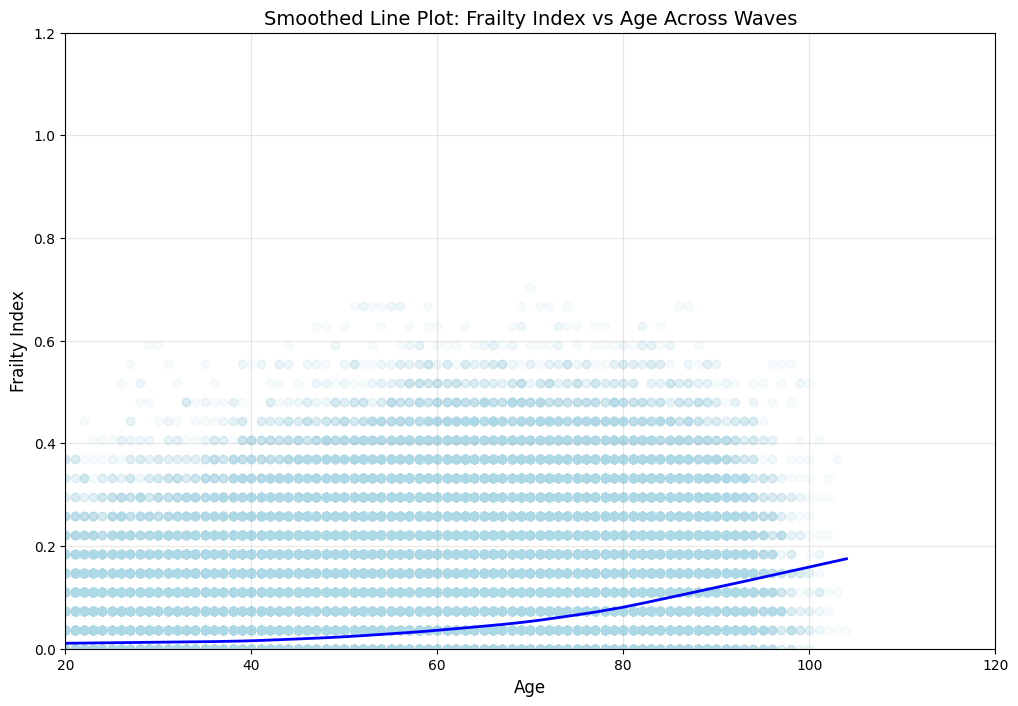

Plot displayed

Summary Statistics:
count    434440.000000
mean          0.055089
std           0.079298
min           0.000000
25%           0.000000
50%           0.037037
75%           0.074074
max           0.703704
Name: frailty, dtype: float64

Number of observations used in the plot: 434440

Number of observations with frailty score 1: 0

Age range:
count    434440.000000
mean         51.332027
std          17.389620
min          20.000000
25%          38.000000
50%          51.000000
75%          65.000000
max         104.000000
Name: age_dv, dtype: float64


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv')

# Filter out NaN frailty scores, and ages below 20 or above 120
df_filtered = df[(df['frailty'] >= 0) & 
                 (df['frailty'].notna()) & 
                 (df['age_dv'] >= 20) & 
                 (df['age_dv'] <= 120)]

# Perform LOWESS smoothing
smoothed = lowess(df_filtered['frailty'], df_filtered['age_dv'], frac=0.15)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['age_dv'], df_filtered['frailty'], alpha=0.1, color='lightblue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='blue', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frailty Index', fontsize=12)
plt.title('Smoothed Line Plot: Frailty Index vs Age Across Waves', fontsize=14)
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(20, 120)
plt.ylim(0, 1.2)

# Show the plot
plt.show()

print("Plot displayed")

# Print some summary statistics
print("\nSummary Statistics:")
print(df_filtered['frailty'].describe())
print("\nNumber of observations used in the plot:", len(df_filtered))
print("\nNumber of observations with frailty score 1:", (df_filtered['frailty'] == 1).sum())
print("\nAge range:")
print(df_filtered['age_dv'].describe())

### More plots

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_10794/4229942435.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_rounded'] = df_filtered['age_dv'].round().astype(int)


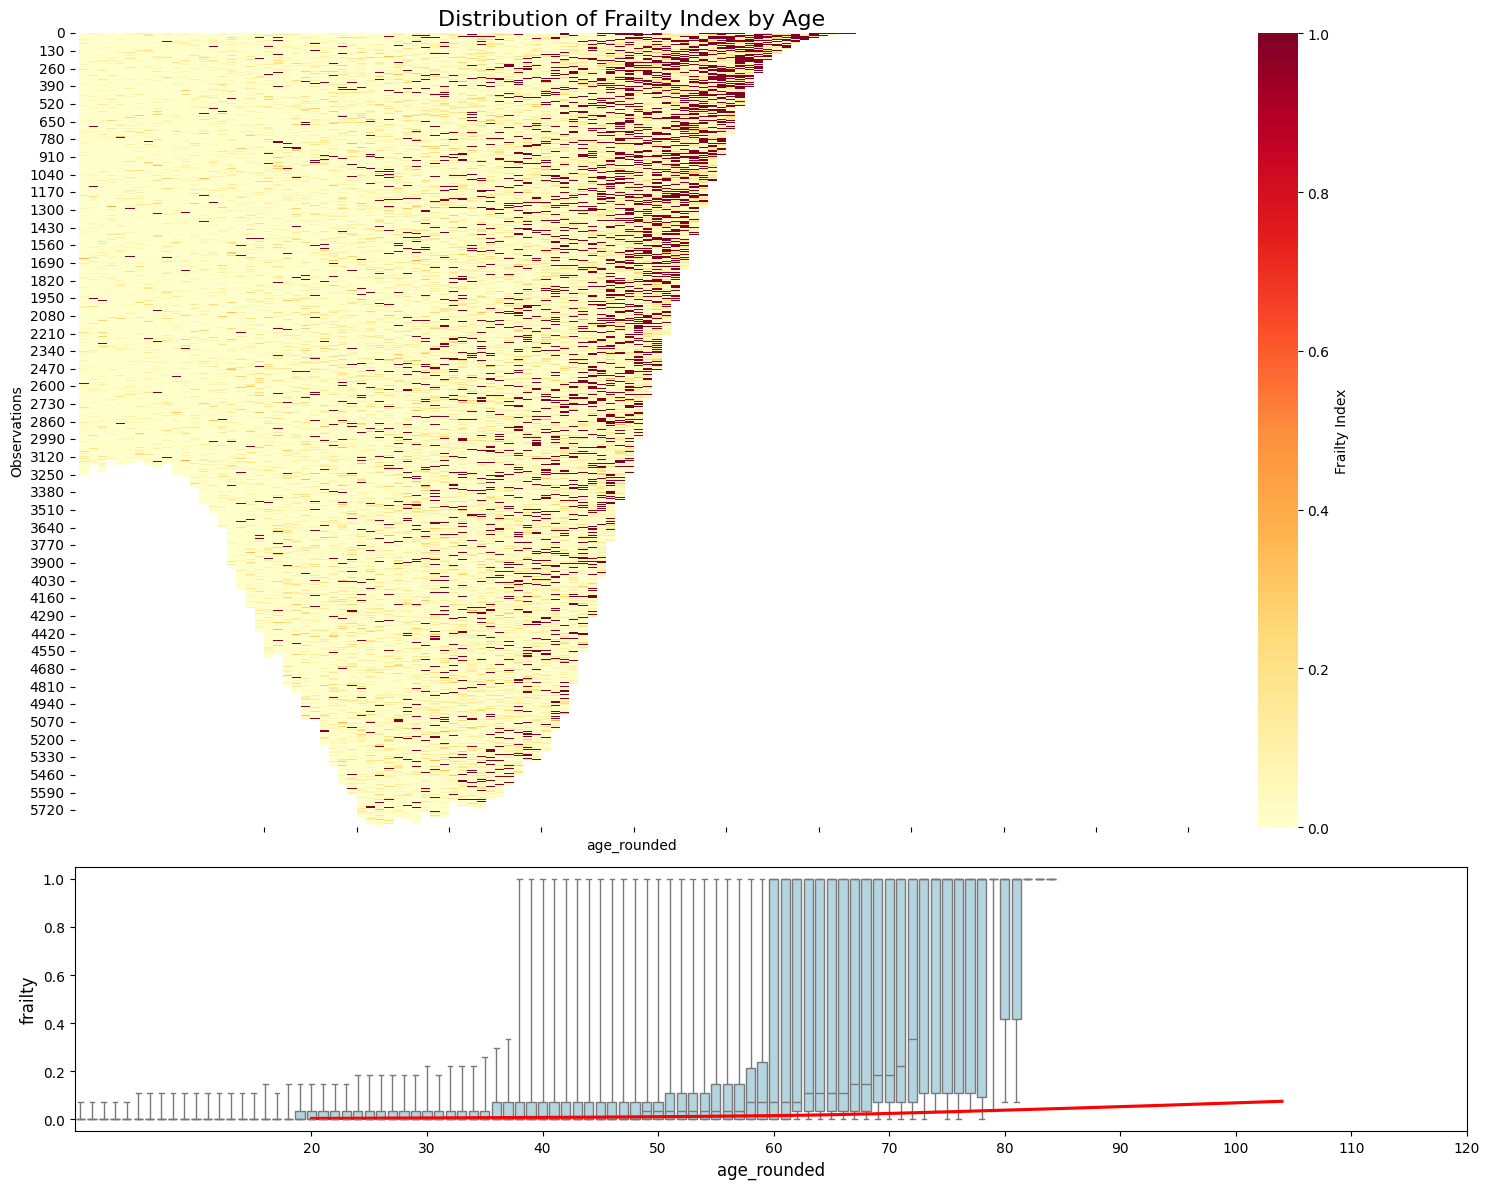

Plot displayed

Summary Statistics:
count    298366.000000
mean          0.104419
std           0.261008
min           0.000000
25%           0.000000
50%           0.000000
75%           0.074074
max           1.000000
Name: frailty, dtype: float64

Number of observations used in the plot: 298366

Number of observations with frailty score 1: 22397

Age range:
count    298366.000000
mean         54.046708
std          17.570502
min          20.000000
25%          41.000000
50%          55.000000
75%          68.000000
max         104.000000
Name: age_dv, dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty_long_panel.csv')

# Filter out NaN frailty scores, and ages below 20 or above 120
df_filtered = df[(df['frailty'] >= 0) & 
                 (df['frailty'].notna()) & 
                 (df['age_dv'] >= 20) & 
                 (df['age_dv'] <= 120)]

# Round ages to nearest integer
df_filtered['age_rounded'] = df_filtered['age_dv'].round().astype(int)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), 
                               gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Heatmap
heatmap_data = df_filtered.groupby('age_rounded')['frailty'].apply(list).apply(pd.Series)
sns.heatmap(heatmap_data.T, cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Frailty Index'})
ax1.set_ylabel('Observations')
ax1.set_title('Distribution of Frailty Index by Age', fontsize=16)

# Boxplot
sns.boxplot(x='age_rounded', y='frailty', data=df_filtered, ax=ax2, 
            whis=[5, 95], color='lightblue', fliersize=0)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Frailty Index', fontsize=12)

# Adjust x-axis ticks
ax2.set_xticks(range(20, 121, 10))
ax2.set_xticklabels(range(20, 121, 10))

# Add a smoothed trend line to the boxplot
sns.regplot(x='age_rounded', y='frailty', data=df_filtered, ax=ax2, 
            scatter=False, color='red', lowess=True)

plt.tight_layout()
plt.show()

print("Plot displayed")

# Print some summary statistics
print("\nSummary Statistics:")
print(df_filtered['frailty'].describe())
print("\nNumber of observations used in the plot:", len(df_filtered))
print("\nNumber of observations with frailty score 1:", (df_filtered['frailty'] == 1).sum())
print("\nAge range:")
print(df_filtered['age_dv'].describe())